# Visualizations of Sampling Times for dDDPM vs. DDPM
This notebook will compare the sampling times of the dDDPM and DDPM, in regards to number of samples and depth of the models.

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [9]:
st_x0 = 13.668033170843124
st_x2 = 0.5157826017618179
st_x3 = 0.14844002240498863
st_x4 = 0.07645889310836793
n_samples = np.arange(0, 1000, 1)
n_ts = np.arange(0, 10000, 10)

In [10]:
def add_interval_plot(ax, x, sample_time, factor:float=1., label:str='', err:float=0.1):
    time = sample_time * x * factor
    time_high = (sample_time * (1 + err)) * x * factor
    time_low = (sample_time * (1 - err)) * x * factor
    ax.plot(x, time, label=label)
    ax.fill_between(
        x, time_high, time_low,
        alpha=0.25, interpolate=True
    )

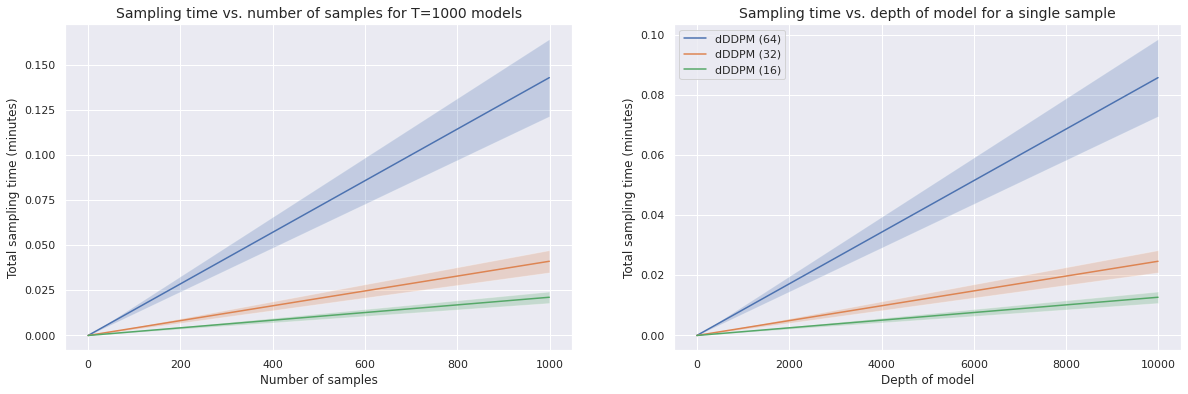

In [13]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))
ERR = 0.15

# add_interval_plot(ax[0], n_samples, st_x0, 1 / 3600, 'DDPM', ERR)
add_interval_plot(ax[0], n_samples, st_x2, 1 / 3600, 'dDDPM (64)', ERR)
add_interval_plot(ax[0], n_samples, st_x3, 1 / 3600, 'dDDPM (32)', ERR)
add_interval_plot(ax[0], n_samples, st_x4, 1 / 3600, 'dDDPM (16)', ERR)
ax[0].set_title('Sampling time vs. number of samples for T=1000 models', fontsize=14)
ax[0].set_ylabel('Total sampling time (minutes)')
ax[0].set_xlabel('Number of samples')
# ax[0].set_yscale('log')

# add_interval_plot(ax[1], n_ts, st_x0 / 1000, 1 / 60, 'DDPM', ERR)
add_interval_plot(ax[1], n_ts, st_x2 / 1000, 1 / 60, 'dDDPM (64)', ERR)
add_interval_plot(ax[1], n_ts, st_x3 / 1000, 1 / 60, 'dDDPM (32)', ERR)
add_interval_plot(ax[1], n_ts, st_x4 / 1000, 1 / 60, 'dDDPM (16)', ERR)
ax[1].set_title('Sampling time vs. depth of model for a single sample', fontsize=14)
ax[1].set_ylabel('Total sampling time (minutes)')
ax[1].set_xlabel('Depth of model')
# ax[1].set_yscale('log')

plt.legend(loc='best')
# plt.savefig('../sampling_times.png', bbox_inches='tight')
plt.show()